# DmX Challenge: Predictive Credit Risk Modeling Using Customer Credit Scores and Phone Footprints


In [59]:
# ──────────────────────────────────────────────────────────────────────────
# Script Name : training_etl.py
# Author      : Dilan Castañeda, Paulo Ibarra, Bruno Díaz, Fatima Quintana
# Created On  : September 18, 2024
# Last Update : September 23, 2024
# Version     : 0.0.4
# Description : Credit risk modeling using bureau reports and phone data to predict client default probability.
#──────────────────────────────────────────────────────────────────────────

## Overview

---
Instituto Tecnológico y de Estudios Superiores de Monterrey

Analítica de datos y herramientas de inteligencia artificial TI3001C.103

Profesor: Enrique Ricardo García Hernández

Equipo 2:
*   Dilan González Castañeda             A00831905
*   Fátima Pamela Ramón Quintana         A00833076
*   Paulo Ibarra A01632632
*   Bruno Díaz Flores A0082455


---

**Overview**

Credit risk modeling using bureau reports and phone usage data to predict client default probability for loan approval decisions.

**Database Source**

The database for this project was provided by DMX, containing comprehensive credit bureau reports and detailed phone usage data for each client.

**Key Components**

1. Credit Bureau Data:

* Credit history
* Loan inquiries
* Payment behaviors
* Current debt levels


2. Phone Usage Data:

* Subscription type
* Usage patterns
* Payment history
* Device information


3.  Target Variable:

* Client default status (binary: defaulted or not)



**Project Goals**

Develop a predictive model to assess the likelihood of client loan default
Optimize loan approval decisions based on calculated risk
Enhance the overall loan portfolio quality by minimizing potential defaults

**Methodology**

* Utilize machine learning techniques to analyze historical data
* Incorporate both traditional credit metrics and alternative data (phone usage)
* Create a robust model that can handle various data types and complex relationships

**Expected Outcome**
A reliable credit risk assessment tool that can:

* Accurately predict client default probability
* Assist in making informed loan approval decisions
* Potentially increase approval rates for creditworthy clients while minimizing risk

This project aims to leverage the unique combination of traditional credit data and alternative phone usage data provided by DMX to create a more comprehensive and accurate credit risk assessment model.

### 1. ETL for Model Training

#### Purpose
- Prepare historical data for model development and training.

#### Process
1. **Extract**:
   - Pull historical data from DMX database (credit bureau reports and phone usage data).
   - Include all available features and the target variable (default status).

2. **Transform**:
   - Handle missing values, outliers, and data quality issues.
   - Perform feature engineering (e.g., creating interaction terms, deriving new features).
   - Encode categorical variables.
   - Normalize or standardize numerical features.

3. **Load**:
   - Store the processed data in a format suitable for model training (e.g., parquet files, a data warehouse).

#### Benefits
- Can perform extensive data cleaning and feature engineering.
- Allows for complex transformations that might be computationally expensive.
- Can use the full historical dataset for better feature creation and selection.

By implementing separate ETL processes for training and scoring, we can optimize our credit risk model for both comprehensive learning from historical data and efficient, consistent scoring of new records.

## ETL

### Extract

In [60]:
%pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from typing import Dict, List

In [62]:
# Define the path to the file
# Using the file inside the repository
file_name = r'C:\Users\dilan\Documents\Github\DataAnalysis_and_AI\period_2\Resources\Challenge\base_Reto.csv'
# Using the file from the repository
url = 'https://raw.githubusercontent.com/magotronico/DataAnalysis_and_AI/main/period_2/Resources/Challenge/base_Reto.csv'

# Load original DataBase (csv)
df = pd.read_csv(url, encoding='latin-1') # You can use the file_name variable to load the file if you have it in your local machine
df = pd.read_csv(url, encoding='latin-1')

# Display the first 3 rows of the dataframe
df.head(3)
# Display resume of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25101 entries, 0 to 25100
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Solicitud_id                             25101 non-null  float64
 1   Aprobado                                 25101 non-null  int64  
 2   Hit_Buro_Huella                          25101 non-null  int64  
 3   Malo                                     25101 non-null  int64  
 4   Num_IQ_U3M_PL_Financieras                25101 non-null  int64  
 5   Edad_cliente                             25101 non-null  int64  
 6   Porcentaje_cuentas_abiertas              25101 non-null  float64
 7   Num_IQ_U3M                               25101 non-null  int64  
 8   Num_IQ_U3M_TDC_Banco                     25101 non-null  int64  
 9   MaxMOP_U3M                               25101 non-null  int64  
 10  Saldo_actual_prest_personales            25101

In [63]:
# List of unique values per column
temp_df = pd.DataFrame(columns=['Column', 'dtype', 'Unique Values', 'nan', 'size'])

for column in df.columns:
    unique_values = [df[column].unique()]  # Ensure unique values are in a list
    temp_df = pd.concat([temp_df, pd.DataFrame({'Column': [column], 'dtype': [df[column].dtype], 'Unique Values': unique_values})], ignore_index=True)
    temp_df.loc[temp_df['Column'] == column, 'nan'] = df[column].isnull().sum()
    temp_df.loc[temp_df['Column'] == column, 'size'] = df[column].count()

# Display the resulting dataframe
temp_df

,Column,dtype,Unique Values,nan,size
0,Solicitud_id,float64,"[1993059.0, 1993154.0, 1993230.0, 1993287.0, 1...",0,25101
1,Aprobado,int64,"[1, 0]",0,25101
2,Hit_Buro_Huella,int64,"[11, 10, 1, 0]",0,25101
3,Malo,int64,"[0, 1, -1]",0,25101
4,Num_IQ_U3M_PL_Financieras,int64,"[0, 1, 4, 2, -1, 3, 6, -2, 5, 7, 8, 10, 9, 18]",0,25101
5,Edad_cliente,int64,"[61, 67, 68, 64, 54, 63, 77, 40, 47, 72, 73, 4...",0,25101
6,Porcentaje_cuentas_abiertas,float64,"[0.3, 0.333333333, 0.073170732, 0.75, 0.147286...",0,25101
7,Num_IQ_U3M,int64,"[1, 3, 7, 12, 6, 5, 8, 4, 10, 18, 11, -1, 2, 0...",0,25101
8,Num_IQ_U3M_TDC_Banco,int64,"[0, 1, 2, -1, 5, 4, 3, -2, 6, 7]",0,25101
9,MaxMOP_U3M,int64,"[2, 9, 1, 7, -1, 0, 6, 3, 4, 5]",0,25101


### Transform


#### Estandarize column names

In [64]:
#Create a copy of the original dataframe
df_copy = df.copy(deep=True)
# Estandarize columns names (lowercase and without accents)
df_copy.columns = [unidecode(str(col)).lower() for col in df.columns]
# Replace 'contabilidad' with 'contactabilidad' in column name
df_copy.columns = df_copy.columns.str.replace('contabilidad', 'contactabilidad')

#### Cleaning columns (variables)

In [65]:
# Drop 'solicitud_id' column
df_copy.drop(columns=['solicitud_id'], inplace=True)

In [66]:
# Clean entidad_federativa column
print(len(df_copy['entidad_federativa'].unique()))
print(df_copy['entidad_federativa'].value_counts().sort_index())

36
entidad_federativa
AGS      368
BCN      820
BCS      268
CAM      425
CDM      149
CDMX    1596
CHI     1663
CHS      491
COA     1593
COL      195
DGO      537
EM      2185
GRO      540
GTO      710
HGO      215
JAL     1070
MIC       37
MICH     550
MOR      445
NAY      269
NL      2303
OAX      458
PUE      796
QR       205
QRO      446
SIN     1061
SLP      399
SON     1419
TAB      229
TAM      884
TLA       14
TLAX     210
VER     1650
YUC      549
ZAC      216
Name: count, dtype: int64


In [67]:
# Replace specific entidades with their standardized names
df_copy['entidad_federativa'] = df_copy['entidad_federativa'].replace({
    'CDM': 'CDMX',
    'MIC': 'MICH',
    'QR': 'QRO',
    'TLA': 'TLAX'
})

# Verify the replacements
print(len(df_copy['entidad_federativa'].unique()))
print(df_copy['entidad_federativa'].value_counts().sort_index())



32
entidad_federativa
AGS      368
BCN      820
BCS      268
CAM      425
CDMX    1745
CHI     1663
CHS      491
COA     1593
COL      195
DGO      537
EM      2185
GRO      540
GTO      710
HGO      215
JAL     1070
MICH     587
MOR      445
NAY      269
NL      2303
OAX      458
PUE      796
QRO      651
SIN     1061
SLP      399
SON     1419
TAB      229
TAM      884
TLAX     224
VER     1650
YUC      549
ZAC      216
Name: count, dtype: int64


In [68]:
# Codification of the 'tipo_suscripcion' column
print(df_copy['tipo_suscripcion'].value_counts())

tipo_suscripcion
PREPAGO    13744
MIXTO       1625
POSPAGO     1575
      .      163
Name: count, dtype: int64


In [69]:
# Replace non-valid values with np.nan
df_copy['tipo_suscripcion'] = df_copy['tipo_suscripcion'].apply(lambda x: x if x in ['PREPAGO', 'MIXTO', 'POSPAGO'] else np.nan)

# Final verification of the column
ordinal_encoder = OrdinalEncoder()
df_copy['tipo_suscripcion'] = ordinal_encoder.fit_transform(df_copy[['tipo_suscripcion']])
df_copy['tipo_suscripcion'] = df_copy['tipo_suscripcion']
print(df_copy['tipo_suscripcion'].value_counts()) # 3: PREPAGO, 2: MIXTO, 1: POSPAGO

tipo_suscripcion
2.0    13744
0.0     1625
1.0     1575
Name: count, dtype: int64


#### Categorize DB based on hit_buro_huella (ScoreCards)

In [70]:
#  Split hit_buro_huella into hit_buro and hit_huella
df_copy['hit_buro_huella'] = df_copy['hit_buro_huella'].apply(lambda x: f'{x:02d}')
df_copy['hit_buro'] = df_copy['hit_buro_huella'].str[0].astype(int)
df_copy['hit_huella'] = df_copy['hit_buro_huella'].str[1].astype(int)
df_copy.insert(3, 'hit_buro', df_copy.pop('hit_buro'))
df_copy.insert(4, 'hit_huella', df_copy.pop('hit_huella'))
df_copy.drop('hit_buro_huella', axis=1, inplace=True)

# Grouping info by hit_buro and hit_huella into 4 categories: {1: 00, 2: 01, 3: 10, 4: 11}
df_copy['hit_group'] = df_copy['hit_buro'].astype(str) + df_copy['hit_huella'].astype(str)
df_copy['hit_group'] = df_copy['hit_group'].map({'00': 1, '01': 2, '10': 3, '11': 4})
df_copy.insert(4, 'hit_group', df_copy.pop('hit_group'))

# Drop 'hit_buro' and 'hit_huella' columns
df_copy.drop(columns=['hit_buro', 'hit_huella'], inplace=True)

<b>Create 4 DataFrame (1 per ScoreCard)</b>

In [71]:
# Creating separate dataframes for each 'Hit_Buro_Huella' value
scorecard_1 = df_copy[df_copy['hit_group'] == 1].copy(deep=True)
scorecard_2 = df_copy[df_copy['hit_group'] == 2].copy(deep=True)
scorecard_3 = df_copy[df_copy['hit_group'] == 3].copy(deep=True)
scorecard_4 = df_copy[df_copy['hit_group'] == 4].copy(deep=True)

<b>Leave only the variables that can be used in each score card:</b>
1. Demographic
2. Demographic and footprint
3. Demographic and credit
4. Demographic, credit and footprint

In [72]:
extra = [
    'aprobado', 
    'malo', 
    'hit_group'
]

demografica = [
    'edad_cliente', 
    'entidad_federativa', 
    'ingreso_bruto'
]

buro = [
    'num_iq_u3m_pl_financieras',
    'porcentaje_cuentas_abiertas',
    'num_iq_u3m',
    'num_iq_u3m_tdc_banco',
    'maxmop_u3m',
    'saldo_actual_prest_personales',
    'num_iq_u3m_prest_personales',
    'numero_ctas_atraso_prest_personales_u3m',
    'numero_ctas_atraso_tdc_u3m',
    'ctas_ab_u18m_tdc_banco',
    'num_ctas_prest_pers',
    'flag_prest_nomina',
    'meses_cta_mas_antig',
    'flag_fraude_prest_nomina',
    'flag_fraude_hipotecario',
    'flag_quebranto_prest_personal'
]

huella = [
    'tipo_suscripcion',
    'status',
    'antiguedad_uso_linea_celular',
    'gasto_mensual_telefonia',
    'actividad_usuario',
    'cambio_sim_u3m',
    'variable_37',
    'gasto_ultimos_60_dias',
    'score_fpd',
    'rango_dispositivo',
    'adopcion_tecno',
    'score_incumplimiento',
    'tasa_contactacion',
    'calidad_telefonica',
    'score_contactabilidad_entrante',
    'score_contactabilidad_saliente',
    'disciplina_tech',
    'cluster_sucursales'
]

# Print len of list
print(f'Extra: {len(extra)} columns')
print(f'Demografica: {len(demografica)} columns')
print(f'Buro: {len(buro)} columns')
print(f'Huella: {len(huella)} columns')

Extra: 3 columns
Demografica: 3 columns
Buro: 16 columns
Huella: 18 columns


In [73]:
# Define the columns for each scorecard
scorecard_1_cols = extra + demografica
scorecard_2_cols = extra + demografica + huella
scorecard_3_cols = extra + demografica + buro
scorecard_4_cols = extra + demografica + buro + huella

# Function to keep only specified columns in a dataframe
def keep_columns(df, columns_to_keep):
    return df[df.columns.intersection(columns_to_keep)]

# Modify each scorecard dataframe
scorecard_1 = keep_columns(scorecard_1, scorecard_1_cols)
scorecard_2 = keep_columns(scorecard_2, scorecard_2_cols)
scorecard_3 = keep_columns(scorecard_3, scorecard_3_cols)
scorecard_4 = keep_columns(scorecard_4, scorecard_4_cols)

# Print the number of columns in each scorecard for verification
print(f"Scorecard 1 (Demographic): {scorecard_1.shape[1]} columns")
print(f"Scorecard 2 (Demographic and footprint): {scorecard_2.shape[1]} columns")
print(f"Scorecard 3 (Demographic and credit): {scorecard_3.shape[1]} columns")
print(f"Scorecard 4 (Demographic, credit and footprint): {scorecard_4.shape[1]} columns")

Scorecard 1 (Demographic): 6 columns
Scorecard 2 (Demographic and footprint): 24 columns
Scorecard 3 (Demographic and credit): 22 columns
Scorecard 4 (Demographic, credit and footprint): 40 columns


#### Basic Data Exploration on ScoreCards

1. No Credit Score and No Phone Footprint
2. No Credit Score and Phone Footprint
3. Credit Score and No Phone Footprint
4. Credit Score and Phone Footprint

* Check if there are sufficient observations for ScoreCards. For each ScoreCard:
    * Approval rate (approved by attended)
    * Delinquency rate (bad among observations once approved)
    * Number of observations (of each scorecard with performance and at least 20% with bad outcomes)

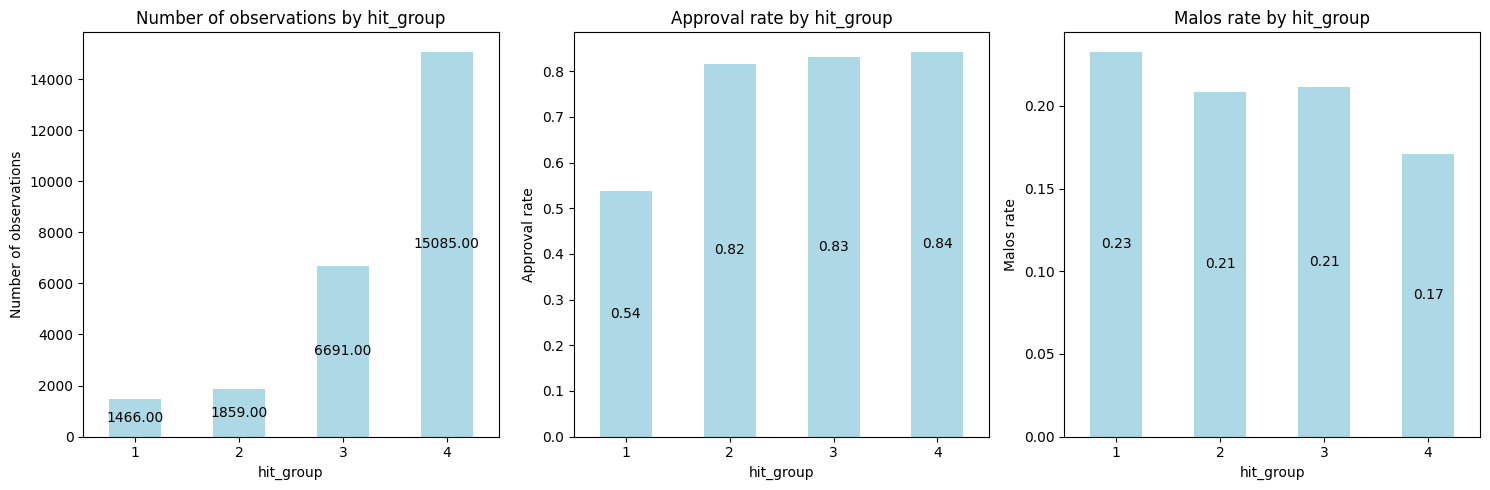

In [74]:
# Number of observations by hit_group
obs_by_hit_group = df_copy['hit_group'].value_counts().sort_index()

# Approval rate by hit_group
approval_rate_by_hit_group = df_copy.groupby('hit_group')['aprobado'].mean()

# Delinquency rate by hit_group: mean of 'malo' column if 'aprobado' == 1
malos_rate_by_hit_group = df_copy[(df_copy['aprobado'] == 1) & (df_copy['malo'] >= 0)].groupby('hit_group')['malo'].mean()

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Number of observations by hit_group
obs_by_hit_group.plot(kind='bar', ax=ax[0], color='lightblue')
ax[0].set_title('Number of observations by hit_group')
ax[0].set_xlabel('hit_group')
ax[0].set_ylabel('Number of observations')

# Approval rate by hit_group
approval_rate_by_hit_group.plot(kind='bar', ax=ax[1], color='lightblue')
ax[1].set_title('Approval rate by hit_group')
ax[1].set_xlabel('hit_group')
ax[1].set_ylabel('Approval rate')

# Delinquency rate by hit_group
malos_rate_by_hit_group.plot(kind='bar', ax=ax[2], color='lightblue')
ax[2].set_title('Malos rate by hit_group')
ax[2].set_xlabel('hit_group')
ax[2].set_ylabel('Malos rate')

for i in range(3):
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0)
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2.), ha='center', va='center', xytext=(0, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Distribution of Age, Gross Income and maxMOp and Morosity

##### Age & Morosity

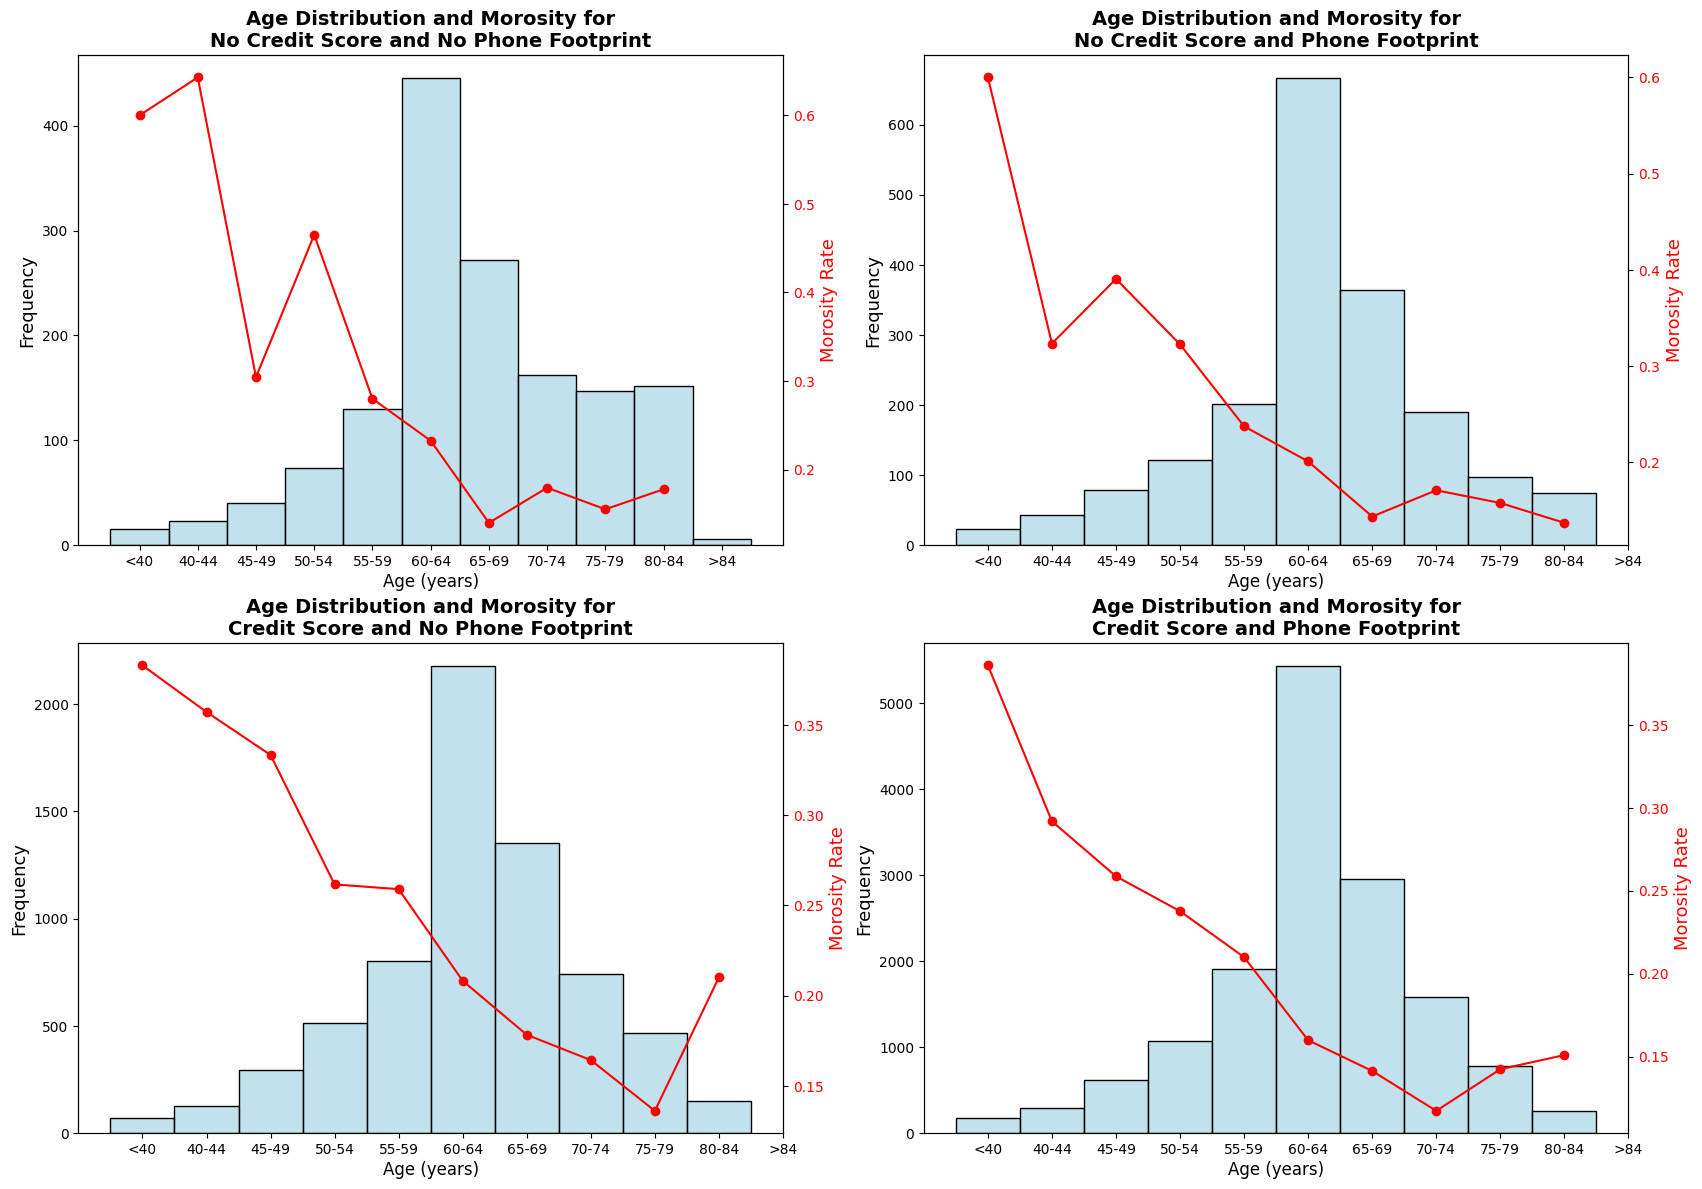

In [75]:
# Dataframes, their labels, and descriptive titles
groups_name = {
    'scorecard_1': 'No Credit Score and No Phone Footprint',
    'scorecard_2': 'No Credit Score and Phone Footprint',
    'scorecard_3': 'Credit Score and No Phone Footprint',
    'scorecard_4': 'Credit Score and Phone Footprint'
}

# Define custom bins and labels
bins = [0, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 150]  # Adding bins for <40 and >84
labels = ['<40', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '>84']


# Age Distribution before scaling
fig, ax = plt.subplots(2, 2, figsize=(20, 14))

for i in range(1, 5):
    df = globals()[f'scorecard_{i}'].copy(deep=True)

    # Categorize the data into the defined bins
    df['age_binned'] = pd.cut(df['edad_cliente'], bins=bins, labels=labels, right=False)

    # Morosity rate by age group (assuming 'malo' is 1 for morose and 0 for non-morose)
    morosity_rate_by_age_group = df[df['aprobado'] == 1].groupby('age_binned', observed=True)['malo'].mean()

    # Plot the distribution of age groups (histogram)
    sns.histplot(df['age_binned'], ax=ax[(i-1)//2][(i-1)%2], color='lightblue')

    # Plot the morosity rate by age group (line plot)
    ax2 = ax[(i-1)//2][(i-1)%2].twinx()  # Create a second y-axis to plot the morosity rate
    ax2.plot(morosity_rate_by_age_group.index, morosity_rate_by_age_group.values, color='red', marker='o')
    ax2.set_ylabel('Morosity Rate', fontsize=13, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Title and labels
    ax[(i-1)//2][(i-1)%2].set_title(f'Age Distribution and Morosity for\n{groups_name[f"scorecard_{i}"]}', fontsize=14, fontweight='bold')
    ax[(i-1)//2][(i-1)%2].set_xlabel('Age (years)', fontsize=12, labelpad=3)
    ax[(i-1)//2][(i-1)%2].set_ylabel('Frequency', fontsize=13)

plt.show()

##### Device Range & Morosity

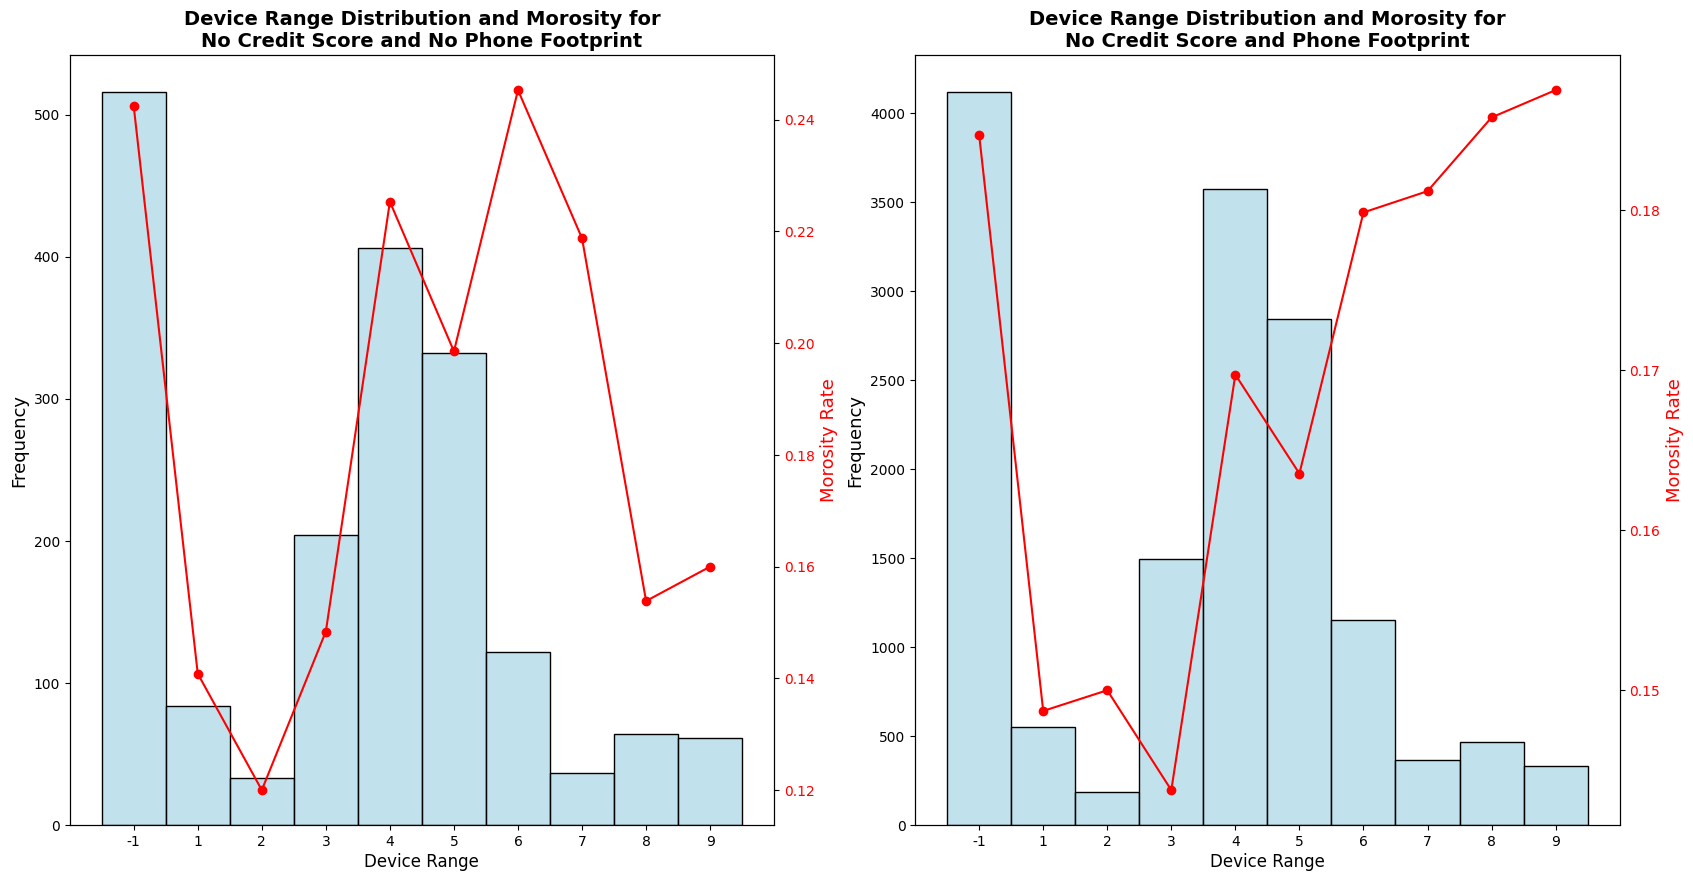

In [76]:
# Define custom bins and labels
bins = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['-1', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Age Distribution before scaling
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Adjust to 1 row and 2 columns since you're plotting only 2 DataFrames

# Only process scorecard_2 and scorecard_4
for i, score in enumerate([2, 4], start=1):
    df = globals()[f'scorecard_{score}'].copy(deep=True)

    # Categorize the data into the defined bins
    df['rango_binned'] = pd.cut(df['rango_dispositivo'], bins=bins, labels=labels, right=False)

    # Morosity rate by age group (assuming 'malo' is 1 for morose and 0 for non-morose)
    morosity_rate_by_age_group = df[df['aprobado'] == 1].groupby('rango_binned', observed=True)['malo'].mean()

    # Plot the distribution of age groups (histogram)
    sns.histplot(df['rango_binned'], ax=ax[i-1], color='lightblue')

    # Plot the morosity rate by age group (line plot)
    ax2 = ax[i-1].twinx()  # Create a second y-axis to plot the morosity rate
    ax2.plot(morosity_rate_by_age_group.index, morosity_rate_by_age_group.values, color='red', marker='o')
    ax2.set_ylabel('Morosity Rate', fontsize=13, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Title and labels
    ax[i-1].set_title(f'Device Range Distribution and Morosity for\n{groups_name[f"scorecard_{i}"]}', fontsize=14, fontweight='bold')
    ax[i-1].set_xlabel('Device Range', fontsize=12, labelpad=3)
    ax[i-1].set_ylabel('Frequency', fontsize=13)

plt.show()

##### Maximum payment management of the last 3 months (MaxMOP_U3M) & Morosity

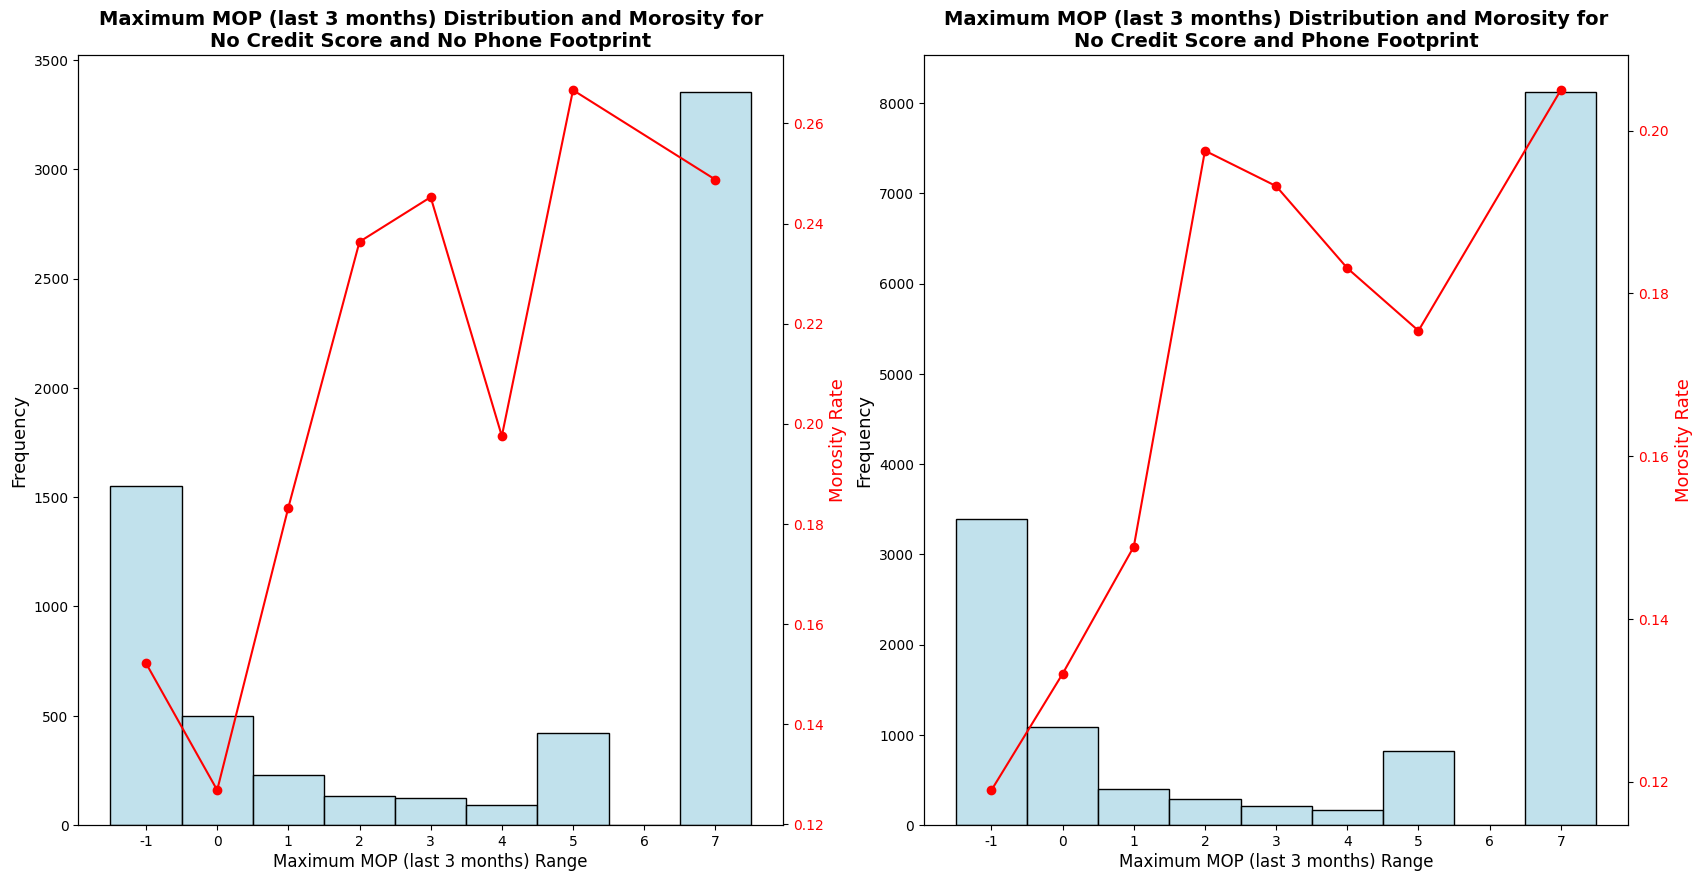

In [77]:
# Define custom bins and labels for maxmop_u3m
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
labels = ['-1','0', '1', '2', '3', '4', '5', '6', '7', '9']

# Distribution before scaling
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Adjust to 1 row and 2 columns since you're plotting only 2 DataFrames

# Only process scorecard_2 and scorecard_4
for i, score in enumerate([3, 4], start=1):
    df = globals()[f'scorecard_{score}'].copy(deep=True)

    # Categorize the data into the defined bins for maxmop_u3m
    df['maxmop_u3m_binned'] = pd.cut(df['maxmop_u3m'], bins=bins, labels=labels, right=False)

    # Morosity rate by maxmop_u3m group (assuming 'malo' is 1 for morose and 0 for non-morose)
    morosity_rate_by_maxmop_u3m_group = df[df['aprobado'] == 1].groupby('maxmop_u3m_binned', observed=True)['malo'].mean()

    # Plot the distribution of maxmop_u3m groups (histogram)
    sns.histplot(df['maxmop_u3m_binned'], ax=ax[i-1], color='lightblue')

    # Plot the morosity rate by maxmop_u3m group (line plot)
    ax2 = ax[i-1].twinx()  # Create a second y-axis to plot the morosity rate
    ax2.plot(morosity_rate_by_maxmop_u3m_group.index, morosity_rate_by_maxmop_u3m_group.values, color='red', marker='o')
    ax2.set_ylabel('Morosity Rate', fontsize=13, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Title and labels
    ax[i-1].set_title(f'Maximum MOP (last 3 months) Distribution and Morosity for\n{groups_name[f"scorecard_{i}"]}', fontsize=14, fontweight='bold')
    ax[i-1].set_xlabel('Maximum MOP (last 3 months) Range', fontsize=12, labelpad=3)
    ax[i-1].set_ylabel('Frequency', fontsize=13)

plt.show()

##### ingreso_bruto & Morosity

Before outliers correction in ingreso_bruto

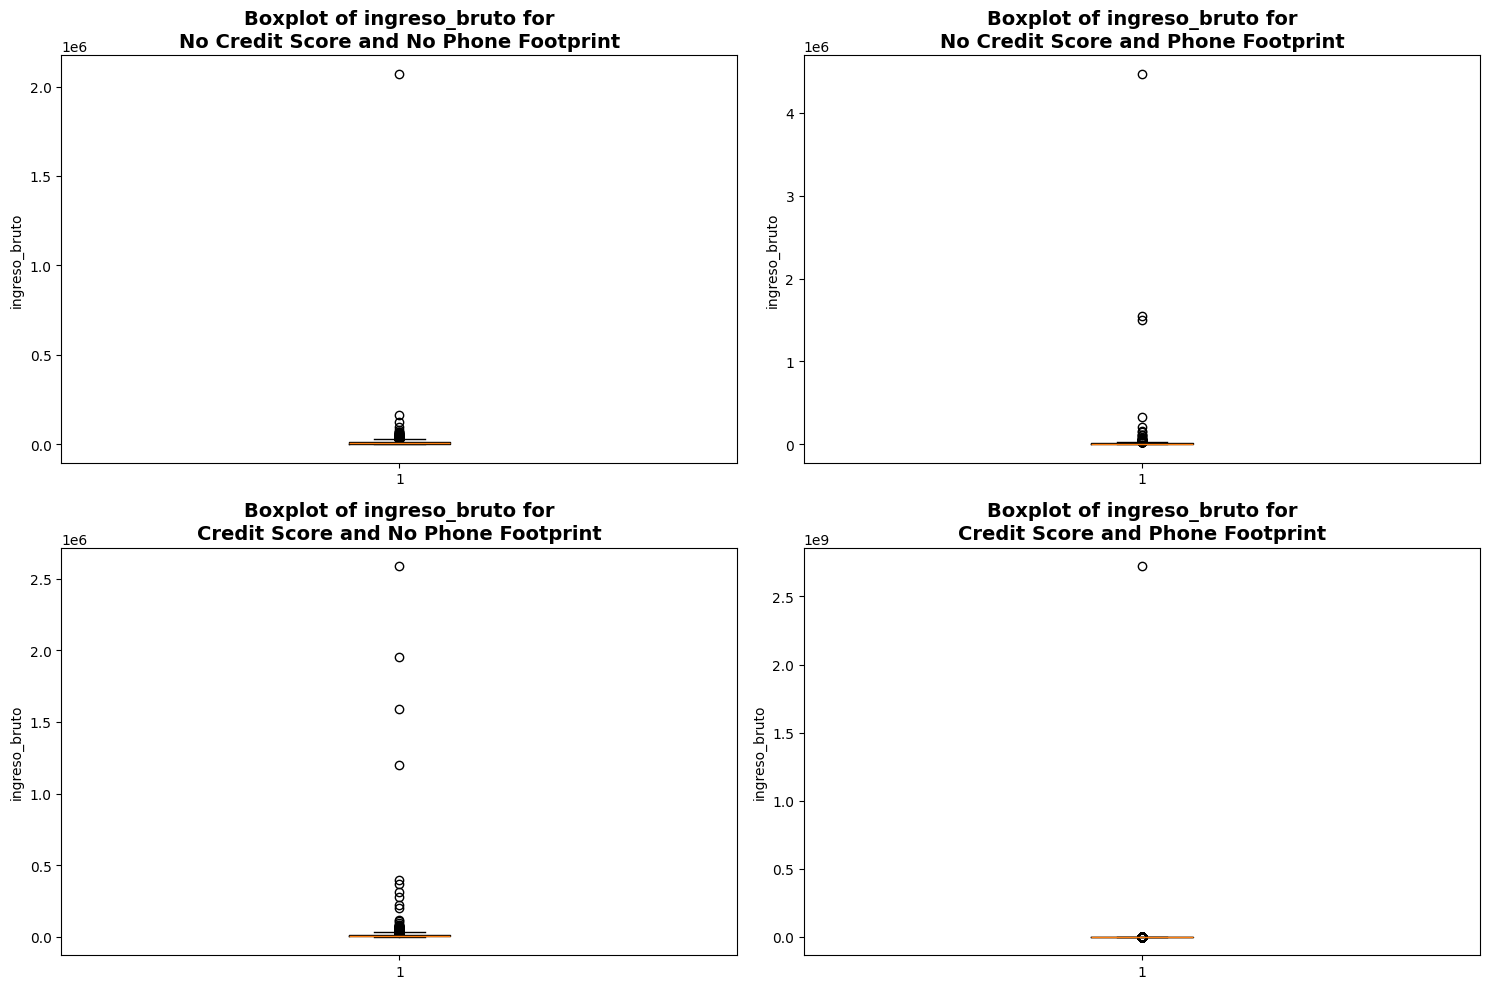

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i in range(1, 5):
  df = globals()[f'scorecard_{i}']
  axes[i-1].boxplot(df['ingreso_bruto'])
  axes[i-1].set_title(f'Boxplot of ingreso_bruto for\n{groups_name[f"scorecard_{i}"]}', fontsize=14, fontweight='bold')
  axes[i-1].set_ylabel('ingreso_bruto')

plt.tight_layout()
plt.show()

Before outliers correction in ingreso_bruto

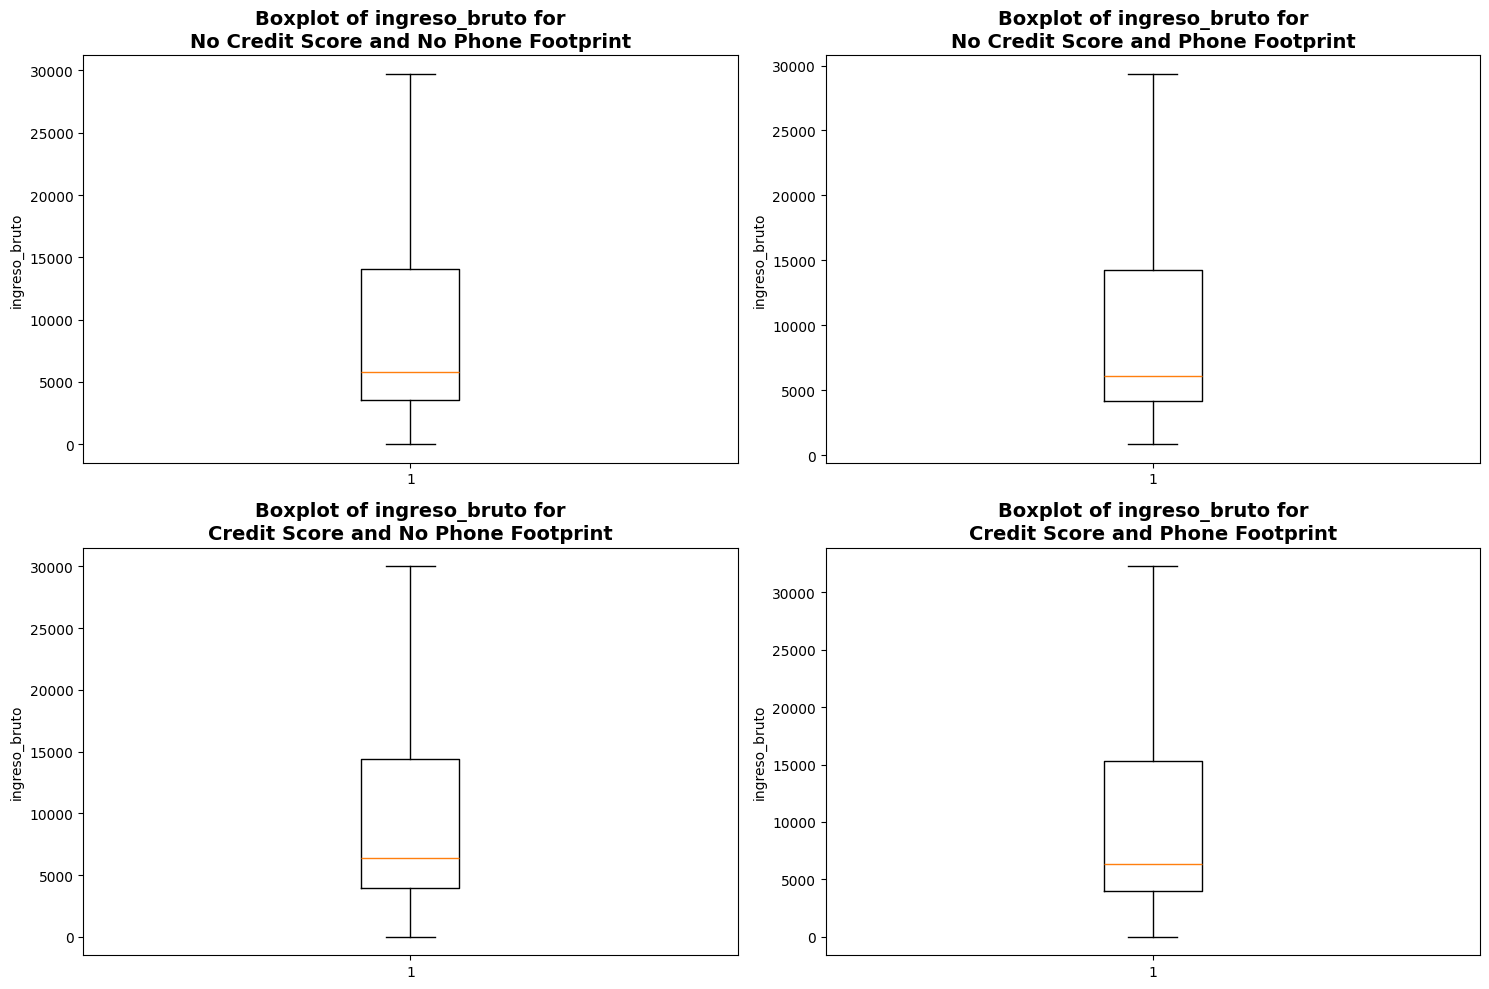

In [79]:
# Regenerate the boxplots to see the changes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i in range(1, 5):
  # Use temporary DataFrame to avoid modifying the original one
  df = globals()[f'scorecard_{i}']
  df = df.copy(deep=True)

  # Calculate the IQR and whiskers
  Q1 = df['ingreso_bruto'].quantile(0.25)
  Q3 = df['ingreso_bruto'].quantile(0.75)
  IQR = Q3 - Q1
  upper_whisker = Q3 + 1.5 * IQR
  lower_whisker = Q1 - 1.5 * IQR

  # Replace outliers with the whiskers
  df['ingreso_bruto'] = np.where(df['ingreso_bruto'] > upper_whisker, upper_whisker, df['ingreso_bruto'])
  df['ingreso_bruto'] = np.where(df['ingreso_bruto'] < lower_whisker, lower_whisker, df['ingreso_bruto'])

  # Plot the boxplot
  axes[i-1].boxplot(df['ingreso_bruto'])
  axes[i-1].set_title(f'Boxplot of ingreso_bruto for\n{groups_name[f"scorecard_{i}"]}', fontsize=14, fontweight='bold')
  axes[i-1].set_ylabel('ingreso_bruto')
  # Save new DataFrame back to the global environment
  globals()[f'scorecard_{i}_clean'] = df

plt.tight_layout()
plt.show()

Plotting of histogram and scatter

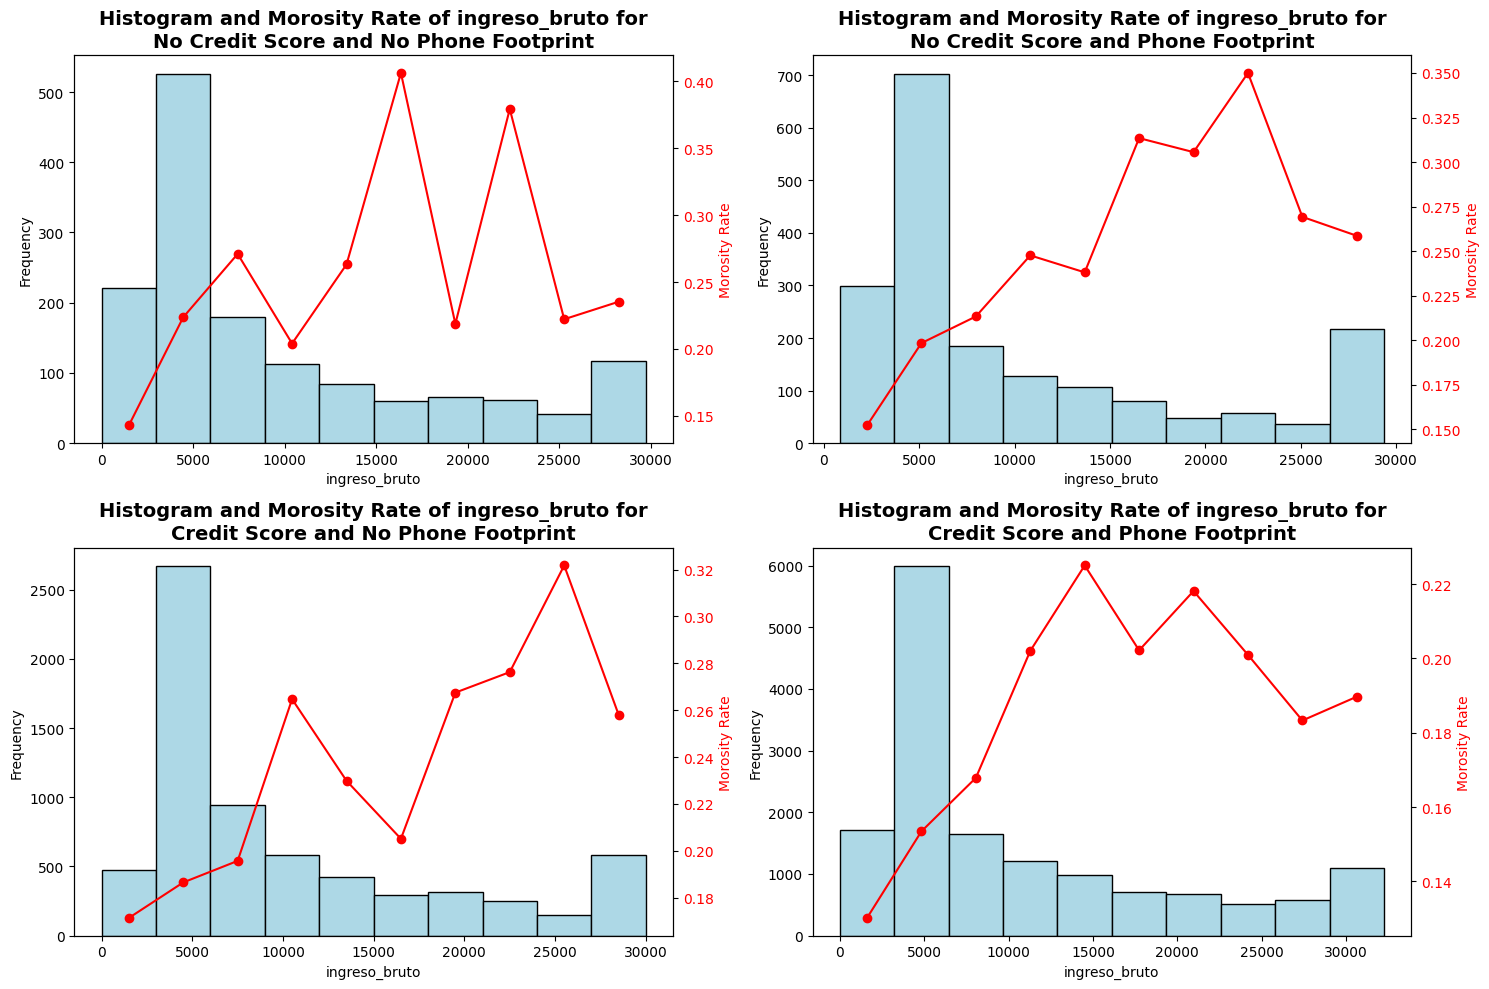

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i in range(1, 5):
    df = globals()[f'scorecard_{i}_clean']

    # Calculate histogram data
    hist, bins = np.histogram(df['ingreso_bruto'], bins=10)

    # Calculate morosity rate for each bin
    morosity_rate = []
    for j in range(len(bins) - 1):
        df
        bin_df = df[(df['ingreso_bruto'] >= bins[j]) & (df['ingreso_bruto'] < bins[j + 1])]
        morosity_rate.append(bin_df[(bin_df['aprobado'] == 1) & (bin_df['malo'] >= 0)]['malo'].mean())

    # Create histogram plot
    axes[i-1].hist(df['ingreso_bruto'], bins=10, color='lightblue', edgecolor='black')
    axes[i-1].set_title(f'Histogram and Morosity Rate of ingreso_bruto for\n{groups_name[f"scorecard_{i}"]}', fontsize=14, fontweight='bold')
    axes[i-1].set_xlabel('ingreso_bruto')
    axes[i-1].set_ylabel('Frequency')

    # Create line plot for morosity rate
    ax2 = axes[i-1].twinx()
    bins_x = (bins[:-1] + bins[1:]) / 2
    ax2.plot(bins_x, morosity_rate, color='red', marker='o')
    ax2.set_ylabel('Morosity Rate', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

#### IV and KS Indicators

##### IV

Tenemos que obtener las variables candidatas para incluir en cada modelo (un modelo por scorecard). Cada variable va a ser candidata si tiene un valor de IV Moderado o Fuerte (IV <= 0.02 No predictivo | 0.02 < IV <= 0.1 Bajo Predictivo | 0.1 < IV <= 0.3 Moderada | IV > 0.3 Fuerte)

##### KS

In [85]:
# List of unique values per column
temp_df = pd.DataFrame(columns=['Column', 'dtype', 'Unique Values', 'Amnt Unique' 'nan', 'size'])

for column in x_train.columns:
    unique_values = [x_train[column].unique()]  # Ensure unique values are in a list
    
    temp_df = pd.concat([temp_df, pd.DataFrame({'Column': [column], 'dtype': [x_train[column].dtype], 'Unique Values': unique_values, 'Amnt Unique': len(unique_values)})], ignore_index=True)
    temp_df.loc[temp_df['Column'] == column, 'nan'] = x_train[column].isnull().sum()
    temp_df.loc[temp_df['Column'] == column, 'size'] = x_train[column].count()

# Display the resulting dataframe
temp_df

In [81]:
# Define helper functions for IV and KS calculations
def calculate_iv_ks(df, target_column, variable):
    # Ensure the variable column is numeric
    df[variable] = pd.to_numeric(df[variable], errors='coerce')

    # Drop any rows with NaN values that result from conversion
    df = df.dropna(subset=[variable])

    # Check if the column has enough unique values for binning
    if df[variable].nunique() < 2:
        print(f"Warning: Variable '{variable}' has fewer than 5 unique values. IV and KS cannot be calculated reliably.")
        return np.nan, "Not Applicable", np.nan, "Not Applicable"

    # Grouping by the variable's bins
    try:
        df['bin'] = pd.qcut(df[variable], q=5, duplicates='drop')
        
        # Check if pd.qcut resulted in too few bins (for example, only 1 bin)
        if df['bin'].nunique() < 2:
            raise ValueError("Not enough unique bins after pd.qcut")
            
    except (ValueError, TypeError) as e:
        # Fallback to pd.cut with fixed bin sizes if pd.qcut fails
        print(f"Warning: pd.qcut failed for variable '{variable}' due to {str(e)}. Using pd.cut instead.")
        
        # Apply pd.cut with a default of 5 bins or fewer based on unique values
        unique_values = df[variable].nunique()
        
        # If there are fewer than 5 unique values, create bins based on unique values
        if unique_values <= 5:
            df['bin'] = pd.cut(df[variable], bins=unique_values, duplicates='drop')
        else:
            df['bin'] = pd.cut(df[variable], bins=5, duplicates='drop')

    # Create a temporary DataFrame to calculate Malos and Buenos
    df = df[df['malo'] >= 0]  # Remove rows with negative values in 'malo'
    grouped = df.groupby('bin', observed=False).agg(
        buenos=('malo', lambda x: (x == 0).sum()),
        malos=('malo', lambda x: (x == 1).sum()),
        count=('malo', 'size')  # Count of rows in each bin
    )

    # Total Buenos, Malos, and Total count of rows
    total_buenos = grouped['buenos'].sum()
    total_malos = grouped['malos'].sum()
    total_count = grouped['count'].sum()

    # Morosity rate for each bin
    grouped['morosity_rate'] = grouped['malos'] / grouped['count']
    
    # Calculating %B, %M, and % of data for each bin
    grouped['%B'] = grouped['buenos'] / total_buenos
    grouped['%M'] = grouped['malos'] / total_malos
    grouped['%data'] = grouped['count'] / total_count  # Percentage of data in each bin

    # Cumulative sums for KS calculation
    grouped['acumB'] = grouped['%B'].cumsum()
    grouped['acumM'] = grouped['%M'].cumsum()

    # IV Calculation
    grouped['prevIV'] = ((grouped['%B'] - grouped['%M']) * 
                         np.log((grouped['%B'] + 0.001) / (grouped['%M'] + 0.001)))
    iv = grouped['prevIV'].sum()

    # KS Calculation
    grouped['prevKS'] = abs(grouped['acumB'] - grouped['acumM'])
    ks = grouped['prevKS'].max()

    # Classifications
    iv_classification = classify_iv(iv)
    ks_classification = classify_ks(ks)

    # Check if any bin has less than 5% of the data
    below_5_percent = (grouped['%data'] < 0.05).any()
    if below_5_percent:
        print(f"\033[93mWarning: Some bins for variable '{variable}' contain less than 5% of the data.\033[0m")

    # Print the temporary DataFrame to see intermediate calculations
    print(f"\nIntermediate calculations for variable: {variable}")
    print(tabulate(grouped, headers='keys', tablefmt='psql'))

    return iv, iv_classification, ks, ks_classification

def classify_iv(iv):
    if iv <= 0.02:
        return 'No predice'
    elif 0.02 < iv <= 0.1:
        return 'Bajo'
    elif 0.1 < iv <= 0.3:
        return 'Moderado'
    else:
        return 'Fuerte'

def classify_ks(ks):
    if ks <= 0.2:
        return 'Pobre'
    elif 0.2 < ks <= 0.3:
        return 'Aceptable'
    elif 0.3 < ks <= 0.4:
        return 'Buena'
    else:
        return 'Muy buena'

# Main function to compute IV and KS for all scorecards
def compute_scorecard_metrics(scorecards):
    results = []
    for scorecard_num, df in enumerate(scorecards, 1):
        print(f"\033[92m\nProcessing Scorecard {scorecard_num}...\033[0m")
        # Extract columns based on the three categories: demographic, credit, and footprint
        demographic_vars = [col for col in df.columns if col in demografica]
        credit_vars = [col for col in df.columns if col in buro]
        footprint_vars = [col for col in df.columns if col in huella]

        # Combine all variables into a list
        all_variables = [(var, 'demographic') for var in demographic_vars] + \
                        [(var, 'buro') for var in credit_vars] + \
                        [(var, 'huella') for var in footprint_vars]

        # Create a DataFrame to store the final results for this scorecard
        scorecard_results = []

        # Compute IV and KS for each variable
        for variable, topic in all_variables:
            iv, iv_classification, ks, ks_classification = calculate_iv_ks(df, 'malo', variable)
            scorecard_results.append([topic, variable, iv, iv_classification, ks, ks_classification])

        # Convert results to DataFrame and append to final results list
        scorecard_df = pd.DataFrame(scorecard_results, columns=['topic', 'variable', 'IV', 'IV_classification', 'KS', 'KS_classification'])
        results.append((scorecard_num, scorecard_df))

    return results

# List of scorecards to analyze
scorecards = [scorecard_1_clean, scorecard_2_clean, scorecard_3_clean, scorecard_4_clean]

# Compute IV and KS for all scorecards
results = compute_scorecard_metrics(scorecards)



Processing Scorecard 1...

Intermediate calculations for variable: edad_cliente
+----------------+----------+---------+---------+-----------------+----------+-----------+----------+----------+----------+-------------+----------+
| bin            |   buenos |   malos |   count |   morosity_rate |       %B |        %M |    %data |    acumB |    acumM |      prevIV |   prevKS |
|----------------+----------+---------+---------+-----------------+----------+-----------+----------+----------+----------+-------------+----------|
| (27.999, 60.0] |      143 |      81 |     224 |        0.361607 | 0.235974 | 0.440217  | 0.283544 | 0.235974 | 0.440217 | 0.126956    | 0.204244 |
| (60.0, 63.0]   |      142 |      42 |     184 |        0.228261 | 0.234323 | 0.228261  | 0.232911 | 0.470297 | 0.668478 | 0.000158235 | 0.198181 |
| (63.0, 67.0]   |      135 |      24 |     159 |        0.150943 | 0.222772 | 0.130435  | 0.201266 | 0.693069 | 0.798913 | 0.0491345   | 0.105844 |
| (67.0, 75.0]   |      1

In [82]:
# Print the final results for each scorecard
for scorecard_num, result_df in results:
    print(f"\nScorecard {scorecard_num} Results:")
    print(tabulate(result_df, headers='keys', tablefmt='psql'))


Scorecard 1 Results:
+----+-------------+--------------------+-------------+---------------------+------------+---------------------+
|    | topic       | variable           |          IV | IV_classification   |         KS | KS_classification   |
|----+-------------+--------------------+-------------+---------------------+------------+---------------------|
|  0 | demographic | edad_cliente       |   0.222933  | Moderado            |   0.204244 | Aceptable           |
|  1 | demographic | ingreso_bruto      |   0.0638852 | Bajo                |   0.105288 | Pobre               |
|  2 | demographic | entidad_federativa | nan         | Not Applicable      | nan        | Not Applicable      |
+----+-------------+--------------------+-------------+---------------------+------------+---------------------+

Scorecard 2 Results:
+----+-------------+--------------------------------+--------------+---------------------+-------------+---------------------+
|    | topic       | variable         

### Load

## Training Models

### Split raw database

* 75% train - 25% test 

In [89]:
apr_4 = df_copy[(df_copy['aprobado'] == 1) & (df_copy['hit_group'] == 4)]

y = apr_4['malo']
x = apr_4.drop(columns=['malo', 'aprobado', 'hit_group'])

In [84]:
# Split dataset into training set and test set
# 75% training and 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [91]:
# List of unique values per column
temp_df = pd.DataFrame(columns=['Column', 'dtype', 'Unique Values', 'amnt_unique','nan', 'size'])

for column in apr_4.columns:
    unique_values = [apr_4[column].unique()]  # Ensure unique values are in a list
    amnt_unique = apr_4[column].nunique()
    temp_df = pd.concat([temp_df, pd.DataFrame({'Column': [column], 'dtype': [apr_4[column].dtype], 'Unique Values': unique_values, 'amnt_unique': amnt_unique})], ignore_index=True)
    temp_df.loc[temp_df['Column'] == column, 'nan'] = apr_4[column].isnull().sum()
    temp_df.loc[temp_df['Column'] == column, 'size'] = apr_4[column].count()

# Display the resulting dataframe
temp_df

,Column,dtype,Unique Values,amnt_unique,nan,size
0,aprobado,int64,[1],1,0,12719
1,malo,int64,"[0, 1]",2,0,12719
2,hit_group,int64,[4],1,0,12719
3,num_iq_u3m_pl_financieras,int64,"[0, 1, 4, 2, 3, -2, 6, 5, 7, 8]",10,0,12719
4,edad_cliente,int64,"[61, 67, 68, 64, 54, 63, 77, 47, 72, 73, 35, 6...",59,0,12719
5,porcentaje_cuentas_abiertas,float64,"[0.3, 0.333333333, 0.073170732, 0.75, 0.147286...",1011,0,12719
6,num_iq_u3m,int64,"[1, 3, 7, 12, 6, 8, 4, 18, 5, 2, 0, 15, 48, 10...",44,0,12719
7,num_iq_u3m_tdc_banco,int64,"[0, 2, 1, 5, 4, 3, -2, 6]",8,0,12719
8,maxmop_u3m,int64,"[2, 9, 1, 7, 6, 0, 3, 4, 5, -1]",10,0,12719
9,saldo_actual_prest_personales,int64,"[900, 0, 120542, 20856, 1157657, 302875, 41467...",8661,0,12719


### x_train treatment

#### Outliers correction

In [86]:
def outlier_correction(df: DataFrame, val_threshold: int = 10, tail_threshold: float = 0.05) -> DataFrame:
    """
    This function get to correct all outliers in non categorical numeric variables.

    **Parameters**

    val_threshold: *int* [default = 10] Amount of unique values before considered a variable categorical.
    tail_threshold: *float* [default = 0.05] Threshold for the tail of the distribution to be considered an outlier.
    df: *DataFrame* Dataframe to be corrected.

    **Returns**
    df_clean: *DataFrame* Dataframe with outliers corrected.
    
    """
    return df

# Apply the outlier_correction function to the training set
x_train_clean = outlier_correction([x_train])

#### IV and KS indicators

In [87]:
def get_iv_ks(df: DataFrame) -> DataFrame:
    """
    This function gets the IV and KS for each variable in the dataframe. 

    **Parameters**

    df: *DataFrame* Dataframe to get the IV and KS.

    **Returns**
    
    res: *DataFrame* Dataframe with summary of the IV and KS for each variable.
    """

    res = df
    
    return res

# Get the IV and KS for the training set
# Add y_train to x_train_clean for outlier correction
x_train_clean['malo'] = y_train.values


# Get the IV and KS for the training set
iv_ks_results = get_iv_ks(x_train_clean)


TypeError: list indices must be integers or slices, not str

#### Features selection

In [36]:
def feature_selection(iv_ks_df: DataFrame, corr_threshold: float = 0.6) -> Dict[str, List]:
    """
    This function gets the features that are going to be used in the model. In case there are 2 or more correlated variables (where the abs(corr) >= 0.6), only the one with the highest IV and KS is going to be selected (priority on KS).

    **Parameters**

    iv_ks_df: *DataFrame* Dataframe with the IV and KS for each variable.
    corr_threshold: *float* [default = 0.6] Threshold for the correlation to be considered high.

    **Returns**
    
    features: *Dict[str, List]* Dictionary with the features selected for the model.
    """
    
    features = {}

    return features

features = feature_selection(iv_ks)

NameError: name 'iv_ks' is not defined

### Decision Tree

#### Training algorithm

### x_test treatment

#### Outliers correction

### Confusion matrix